investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP

## DATA:
## The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.
### Extra credit: download directly from google docs with a google API
 https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0
## Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/
## The world population by country find the download link here : https://data.worldbank.org/indicator/SP.POP.TOTL
## Remember that all read or downloads have to me reproducible.
## Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")
## Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:

import pandas as pd
import numpy as np

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve
import os
import matplotlib.pylab as pl
import matplotlib.colors
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [4]:
url = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
urlretrieve(url,"file.gz")

('file.gz', <http.client.HTTPMessage at 0x7fa3e011f080>)

In [5]:
url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
urlretrieve(url,"file2.gz")

('file2.gz', <http.client.HTTPMessage at 0x7fa3e011f320>)

In [6]:
!unzip -d $PUIDATA file2.gz

Archive:  file2.gz
  inflating: /nfshome/mp4515/PUIdata/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  
  inflating: /nfshome/mp4515/PUIdata/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  
  inflating: /nfshome/mp4515/PUIdata/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  


In [10]:
df1 = pd.read_csv(os.environ["PUIDATA"] +"/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv",skiprows=4)
df1 = df1.loc[:,['Country Name','2012']]
df1.rename(columns={'2012':'GDP'},inplace=True)
df1.head()

,Country Name,GDP
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [7]:
!unzip -d $PUIDATA file.gz

Archive:  file.gz
  inflating: /nfshome/mp4515/PUIdata/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  
  inflating: /nfshome/mp4515/PUIdata/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  
  inflating: /nfshome/mp4515/PUIdata/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  


In [9]:
df = pd.read_csv(os.environ["PUIDATA"] +"/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv",skiprows=4)
df = df.loc[:,['Country Name','2012']]
df.rename(columns={'2012':'population'},inplace=True)
df.head()

,Country Name,population
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [20]:
df_merged = pd.merge(df1,df,on='Country Name')
df_merged.head()

,Country Name,GDP,population
0,Aruba,NaN,102577.0
1,Afghanistan,2.053654e+10,30696958.0
2,Angola,1.139232e+11,25096150.0
3,Albania,1.231978e+10,2900401.0
4,Andorra,3.164615e+09,82431.0


In [12]:
s = pd.read_csv("https://s3.us-east-2.amazonaws.com/pui2018hw7/data-pvLFI.csv")
s.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [16]:
s2 = pd.read_csv("https://github.com/fedhere/PUI2018_fb55/raw/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv")
s2.rename(columns={"Country/Territory":"Country"},inplace=True)
s2 = s2.loc[:,["Country","Number of homicides by firearm","Average total all civilian firearms"]]
s2.head()

,Country,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [18]:
s_merged = pd.merge(s,s2,on='Country')
s_merged.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Number of homicides by firearm,Average total all civilian firearms
0,Australia,15.0,4,30.0,3050000.0
1,Austria,30.4,1,18.0,2500000.0
2,Belgium,17.2,2,70.0,1800000.0
3,Canada,30.8,4,173.0,9950000.0
4,Denmark,12.0,0,15.0,650000.0


In [21]:
df_merged = df_merged.merge(s_merged, right_on="Country", left_on="Country Name")
df_merged.head()

,Country Name,GDP,population,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Number of homicides by firearm,Average total all civilian firearms
0,Australia,1.543411e+12,22742475.0,Australia,15.0,4,30.0,3050000.0
1,Austria,4.094252e+11,8429991.0,Austria,30.4,1,18.0,2500000.0
2,Belgium,4.978842e+11,11128246.0,Belgium,17.2,2,70.0,1800000.0
3,Canada,1.824289e+12,34750545.0,Canada,30.8,4,173.0,9950000.0
4,Switzerland,6.680436e+11,7996861.0,Switzerland,45.7,2,57.0,3400000.0


## exploration
## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)
Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)
Are there any points that look like they may be outilers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


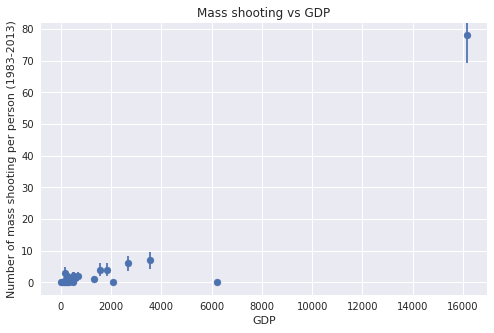

In [32]:
fig = pl.figure(figsize=(8,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged.GDP / 1e9, df_merged['Number of mass shootings (1983-2013)'])
ax.set_ylim()
ax.set_xlabel("GDP")
ax.set_ylabel("Number of mass shooting per person (1983-2013)")
ax.set_title("Mass shooting vs GDP")
ax.errorbar(df_merged.GDP / 1e9, df_merged['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(df_merged['Number of mass shootings (1983-2013)'] ), fmt = '.')
pl.show()


Number of mass shootings per person vs GDP, where errors are representing Poisson statistics.
The top right of plot is USA which has highest GDP and number of shooting per person

In [35]:
df_merged['shooting per person'] = df_merged["Number of mass shootings (1983-2013)"] / df_merged['population'] * 1e3
df_merged.head()

,Country Name,GDP,population,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Number of homicides by firearm,Average total all civilian firearms,shooting per person
0,Australia,1.543411e+12,22742475.0,Australia,15.0,4,30.0,3050000.0,0.000176
1,Austria,4.094252e+11,8429991.0,Austria,30.4,1,18.0,2500000.0,0.000119
2,Belgium,4.978842e+11,11128246.0,Belgium,17.2,2,70.0,1800000.0,0.000180
3,Canada,1.824289e+12,34750545.0,Canada,30.8,4,173.0,9950000.0,0.000115
4,Switzerland,6.680436e+11,7996861.0,Switzerland,45.7,2,57.0,3400000.0,0.000250


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


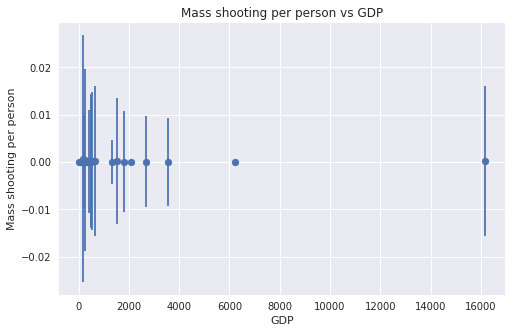

In [38]:
fig = pl.figure(figsize=(8,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged.GDP / 1e9, df_merged['shooting per person'])
ax.errorbar(df_merged.GDP / 1e9, df_merged['shooting per person'], 
            yerr = np.sqrt(df_merged['shooting per person'] ), fmt = '.')
ax.set_ylim()
ax.set_title("Mass shooting per person vs GDP")
ax.set_xlabel("GDP")
ax.set_ylabel("Mass shooting per person")
pl.show()


Mass shooting per person vs GDP

## plot the average number of civilian fire arms per person¶ 
first without errors, then with errors. are there points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


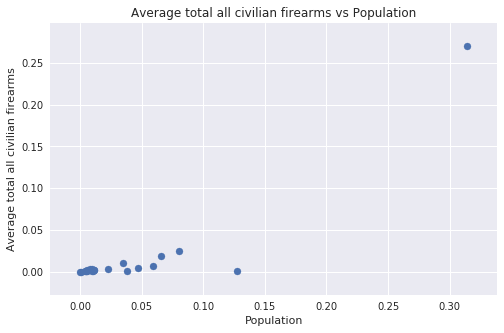

In [41]:
fig = pl.figure(figsize=(8,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged['population']/1e9,df_merged['Average total all civilian firearms']/1e9)
ax.set_ylabel("Average total all civilian firearms")
ax.set_xlabel("Population")
ax.set_title("Average total all civilian firearms vs Population")
pl.show()


Average total all civilian firearms vs Population, USA being top right corner

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


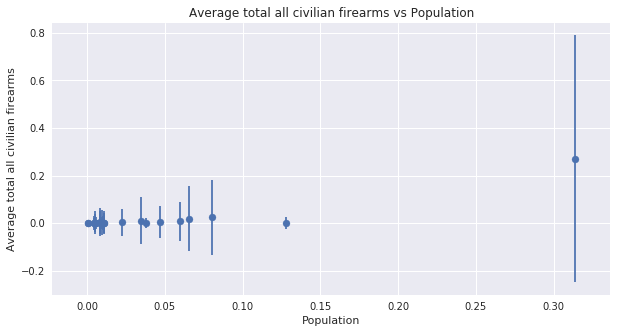

In [42]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged['population']/1e9,df_merged['Average total all civilian firearms']/1e9)
ax.errorbar(df_merged['population']/1e9,df_merged['Average total all civilian firearms']/1e9, 
            yerr = np.sqrt(df_merged['Average total all civilian firearms']/1e9 ), fmt = '.')
ax.set_ylabel("Average total all civilian firearms")
ax.set_xlabel("Population")
ax.set_title("Average total all civilian firearms vs Population")
pl.show()


Average total all civilian firearms vs Population

## plot the average number of homicide by fire arms per person¶ 
first as a histogram
then against the country GDP, with statistical errors. are there points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


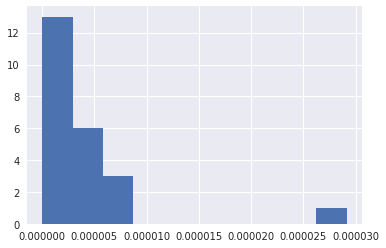

In [63]:
import matplotlib.pyplot as plt
x = df_merged['Number of homicides by firearm']/df_merged['population']
plt.hist(x, orientation='vertical')
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


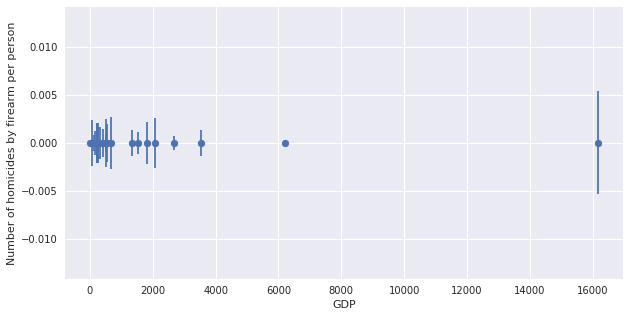

In [68]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged.GDP / 1e9, df_merged['Number of homicides by firearm'] / df_merged['population'] )
ax.errorbar(df_merged.GDP / 1e9, df_merged['Number of homicides by firearm'] / df_merged['population'], 
            yerr = np.sqrt(df_merged['Number of homicides by firearm'] / df_merged['population']), fmt = '.')
ax.set_xlabel("GDP")
ax.set_ylabel("Number of homicides by firearm per person")
pl.show()


Number of homicides by firearm per 1000 person vs GDP

## plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color¶ 
with and without errorbars

In [70]:
df_merged['Color'] = 0
df_merged['Color'][df_merged["Country"]=="United States"] = 1
df_merged['Color2'] = 'b'
df_merged['Color2'][df_merged["Country"]=="United States"] = 'r'

colors = ["Blue","Red"]
cmap = matplotlib.colors.ListedColormap(colors)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


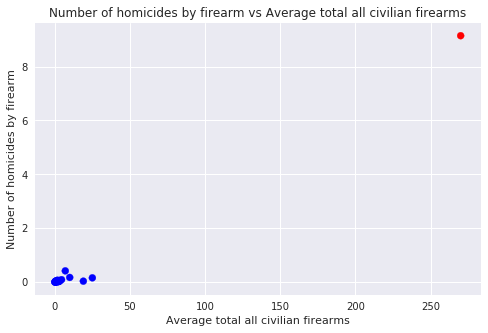

In [75]:

fig = pl.figure(figsize=(8,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged['Average total all civilian firearms'] / 1e6, df_merged['Number of homicides by firearm']/1000,c=df_merged['Color'],cmap=cmap)
ax.set_ylabel("Number of homicides by firearm")
ax.set_xlabel("Average total all civilian firearms")
ax.set_title("Number of homicides by firearm vs Average total all civilian firearms")

pl.show()



Number of homicides by firearm vs Average total all civilian firearms, US is in red

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


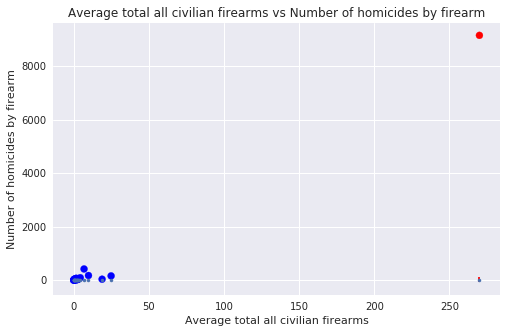

In [88]:

fig = pl.figure(figsize=(8,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged['Average total all civilian firearms'] / 1e6, df_merged['Number of homicides by firearm'],c=df_merged['Color'],cmap=cmap)
ax.errorbar(df_merged['Average total all civilian firearms'] / 1e6, df_merged['Number of homicides by firearm']/1000, 
            yerr = np.sqrt(df_merged['Number of homicides by firearm']), fmt = '.', ecolor = df_merged['Color2'])

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_title("Average total all civilian firearms vs Number of homicides by firearm")

pl.show()

Average total all civilian firearms vs Number of homicides by firearm

## plot the number of mass shootings against the number of civilian firearms. plot the US in a different color
with and without errorbars

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


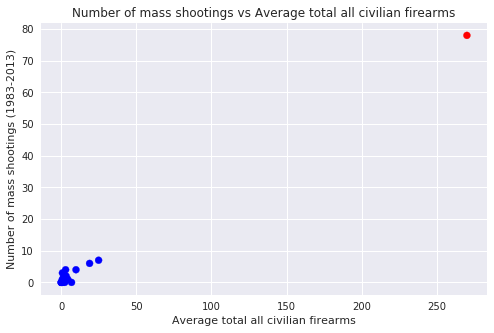

In [90]:
fig = pl.figure(figsize=(8,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_merged['Average total all civilian firearms'] / 1e6, df_merged['Number of mass shootings (1983-2013)'],c=df_merged['Color'],cmap=cmap)
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings (1983-2013)")
ax.set_title("Number of mass shootings vs Average total all civilian firearms")

pl.show()

Number of mass shootings vs Average total all civilian firearms

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


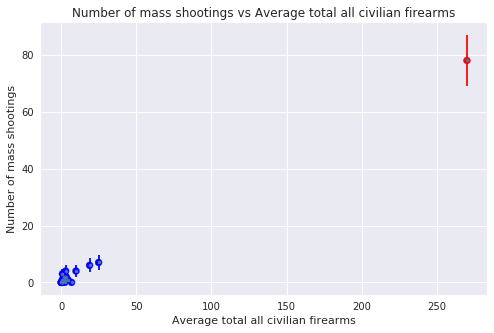

In [93]:
fig = pl.figure(figsize=(8,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_merged['Average total all civilian firearms'] / 1e6, df_merged['Number of mass shootings (1983-2013)'],c=df_merged['Color'],cmap=cmap)
ax.errorbar(df_merged['Average total all civilian firearms'] / 1e6, df_merged['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(df_merged['Number of mass shootings (1983-2013)'] ), fmt = '.', ecolor = df_merged['Color2'])
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_title("Number of mass shootings vs Average total all civilian firearms")
pl.show()

Number of mass shootings vs Average total all civilian firearms

## Modeling
## fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.¶ 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use
- statsmodels OLS
- statsmodels WLS
- seaborn
- choose one of
    -- creating a function that calculates the residuals and minimizing that function
    -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
    -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html


## WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors: weights = 1.0/df.yerror Notice that a - sqrt(0) = 0 b - 1/0 = infinity c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.
the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb Since we did not discuss these, I will add some notes to the repo in the afternoon.
Use the seaborn python package built in regression function to plot the regression confidence intervals.
import seaborn as sns sns.regplot(x="x", y="y", data=df);

In [95]:
df_merged["Average total all civilian firearms per person"] = df_merged["Average total all civilian firearms"] / df_merged['population']
print(df_merged["Average total all civilian firearms per person"].mean())
print(df_merged["shooting per person"].mean())
df_merged['c_unity'] = df_merged["Average total all civilian firearms per person"]
df_merged['s_unity'] = df_merged["shooting per person"] / 0.0001
df_merged.head()

0.226015952454
0.000123568888329


,Country Name,GDP,population,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Number of homicides by firearm,Average total all civilian firearms,shooting per person,Color,Color2,Average total all civilian firearms per person,c_unity,s_unity
0,Australia,1.543411e+12,22742475.0,Australia,15.0,4,30.0,3050000.0,0.000176,0,b,0.134110,0.134110,1.758824
1,Austria,4.094252e+11,8429991.0,Austria,30.4,1,18.0,2500000.0,0.000119,0,b,0.296560,0.296560,1.186241
2,Belgium,4.978842e+11,11128246.0,Belgium,17.2,2,70.0,1800000.0,0.000180,0,b,0.161751,0.161751,1.797228
3,Canada,1.824289e+12,34750545.0,Canada,30.8,4,173.0,9950000.0,0.000115,0,b,0.286326,0.286326,1.151061
4,Switzerland,6.680436e+11,7996861.0,Switzerland,45.7,2,57.0,3400000.0,0.000250,0,b,0.425167,0.425167,2.500981


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


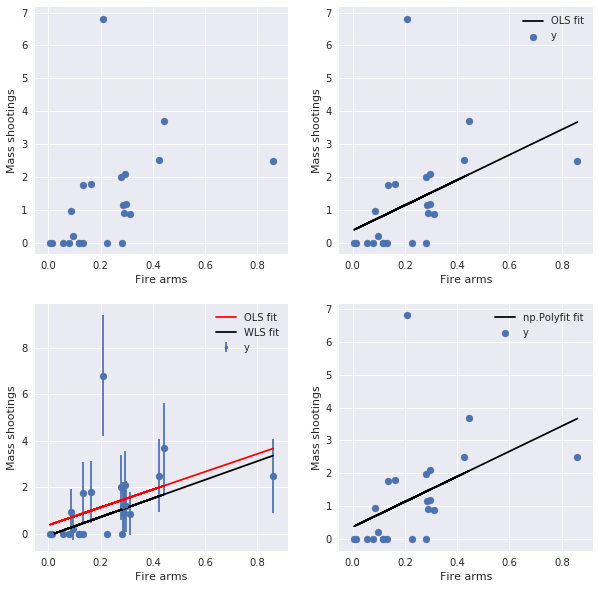

In [103]:
## code block taken from ks5063's repository and re written to understand the code in terms of my code's perspective
fig = pl.figure(figsize=(10,10)) 

ax = fig.add_subplot(221)
scatter = ax.scatter(df_merged['c_unity'], df_merged['s_unity'])
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()

smresult = sm.OLS(df_merged['s_unity'], sm.add_constant(df_merged['c_unity'])).fit()
beta0_sm, beta1_sm = smresult.params
ax = fig.add_subplot(222)
scatter = ax.scatter(df_merged['c_unity'], df_merged['s_unity'],label="y")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.plot(df_merged['c_unity'], df_merged['c_unity'] * beta1_sm + beta0_sm, 'k-',label="OLS fit")
ax.legend()

smresult = sm.OLS(df_merged['s_unity'], sm.add_constant(df_merged['c_unity'])).fit()
beta0_sm, beta1_sm = smresult.params
ax = fig.add_subplot(223)
scatter = ax.scatter(df_merged['c_unity'], df_merged['s_unity'],label=None)
ax.errorbar(df_merged['c_unity'], df_merged['s_unity'], 
            yerr = np.sqrt(df_merged['s_unity']), fmt = '.',label="y")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.plot(df_merged['c_unity'], df_merged['c_unity'] * beta1_sm + beta0_sm, 'r-',label="OLS fit")
weights = 1.0/np.sqrt(df_merged['s_unity'])
weights[weights>2] = 2
smresult2 = sm.WLS(df_merged['s_unity'], sm.add_constant(df_merged['c_unity']),weights=weights).fit()
beta0_sm2, beta1_sm2 = smresult2.params
ax.plot(df_merged['c_unity'], df_merged['c_unity'] * beta1_sm2 + beta0_sm2, 'k-',label="WLS fit")
ax.legend()

beta1_np, beta0_np = np.polyfit(df_merged['c_unity'], df_merged['s_unity'] ,1) 
ax = fig.add_subplot(224)
scatter = ax.scatter(df_merged['c_unity'], df_merged['s_unity'],label="y")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
ax.plot(df_merged['c_unity'], df_merged['c_unity'] * beta1_np + beta0_np, 'k-',label="np.Polyfit fit")
ax.legend()
pl.show()



Fitting a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person using 3 different methods